In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML dataset/CSE 442/Covid Detection/BR-MF.csv")
df.head()

,sex,age,hemoglobina,vcm,leucocitos,neutrofilos,eosinofilos,basofilos,linfocitos,NLR,...,hcm,chcm,rdwP,vmp,neutrofilosP,eosinofilosP,basofilosP,linfocitosP,monocitosP,Condition
0,F,58,9.4,87.0,6590,4587,303,13,949,4.833509,...,29.0,33.3,11.9,10.8,69.6,4.6,0.2,14.4,11.2,1
1,F,51,13.0,80.9,4980,3112,0,10,1638,1.899878,...,26.4,32.6,14.4,10.6,62.5,0.0,0.2,32.9,4.4,1
2,F,38,13.2,85.2,10770,8411,22,32,1734,4.850634,...,29.7,34.8,11.9,9.7,78.1,0.2,0.3,16.1,5.3,0
3,M,65,16.8,87.4,7380,4465,59,37,2133,2.093296,...,30.7,35.1,12.9,11.0,60.5,0.8,0.5,28.9,9.3,0
4,M,61,14.6,85.7,4440,1558,178,18,2145,0.726340,...,30.2,35.2,11.8,11.2,35.1,4.0,0.4,48.3,12.2,1


# Decision Tree

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML dataset/CSE 442/Covid Detection/BR-MF.csv")
df.head()

,sex,age,hemoglobina,vcm,leucocitos,neutrofilos,eosinofilos,basofilos,linfocitos,NLR,...,hcm,chcm,rdwP,vmp,neutrofilosP,eosinofilosP,basofilosP,linfocitosP,monocitosP,Condition
0,F,58,9.4,87.0,6590,4587,303,13,949,4.833509,...,29.0,33.3,11.9,10.8,69.6,4.6,0.2,14.4,11.2,1
1,F,51,13.0,80.9,4980,3112,0,10,1638,1.899878,...,26.4,32.6,14.4,10.6,62.5,0.0,0.2,32.9,4.4,1
2,F,38,13.2,85.2,10770,8411,22,32,1734,4.850634,...,29.7,34.8,11.9,9.7,78.1,0.2,0.3,16.1,5.3,0
3,M,65,16.8,87.4,7380,4465,59,37,2133,2.093296,...,30.7,35.1,12.9,11.0,60.5,0.8,0.5,28.9,9.3,0
4,M,61,14.6,85.7,4440,1558,178,18,2145,0.726340,...,30.2,35.2,11.8,11.2,35.1,4.0,0.4,48.3,12.2,1


In [ ]:
x = df.drop('Condition',axis=1);
y = df['Condition']

le = LabelEncoder()
x['sex'] = le.fit_transform(x['sex'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
modeldt = DecisionTreeClassifier()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
modeldt.fit(x_train,y_train)
y_pred = modeldt.predict(x_test)

0.7122123504709942


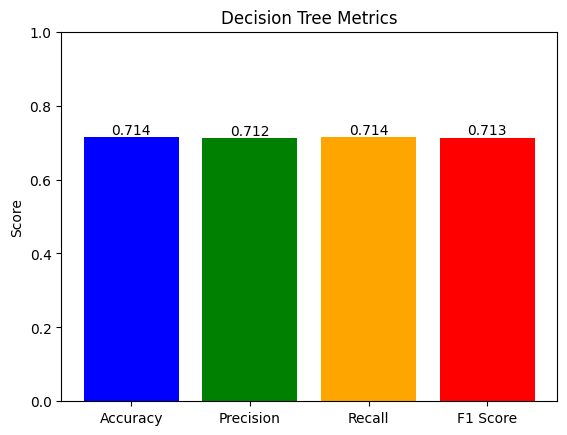

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print(precision)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'green', 'orange', 'red'])

# Adding the value annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
    ax.set_ylim(0,1)

plt.ylabel('Score')
plt.title('Decision Tree Metrics')
plt.show()

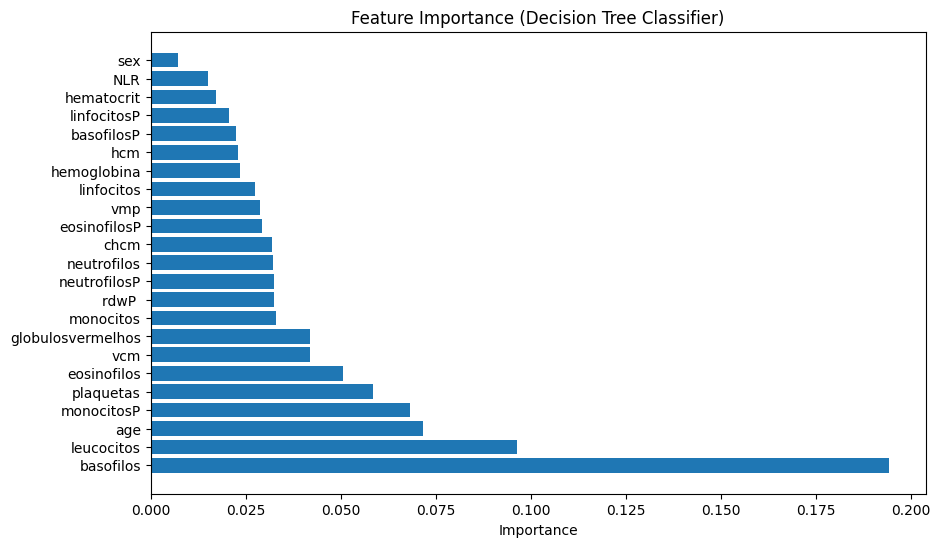

In [ ]:
fimp = modeldt.feature_importances_
fimp_df = pd.DataFrame({'Feature': x.columns, 'Importance': fimp})
fimp_df = fimp_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(fimp_df['Feature'], fimp_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Decision Tree Classifier)')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))
print(f'Presicion Score = {precision_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       623
           1       0.50      0.53      0.51       272

    accuracy                           0.69       895
   macro avg       0.64      0.65      0.64       895
weighted avg       0.70      0.69      0.70       895

Presicion Score = 0.496551724137931


<ipython-input-27-c25ccd799447>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<Axes: >

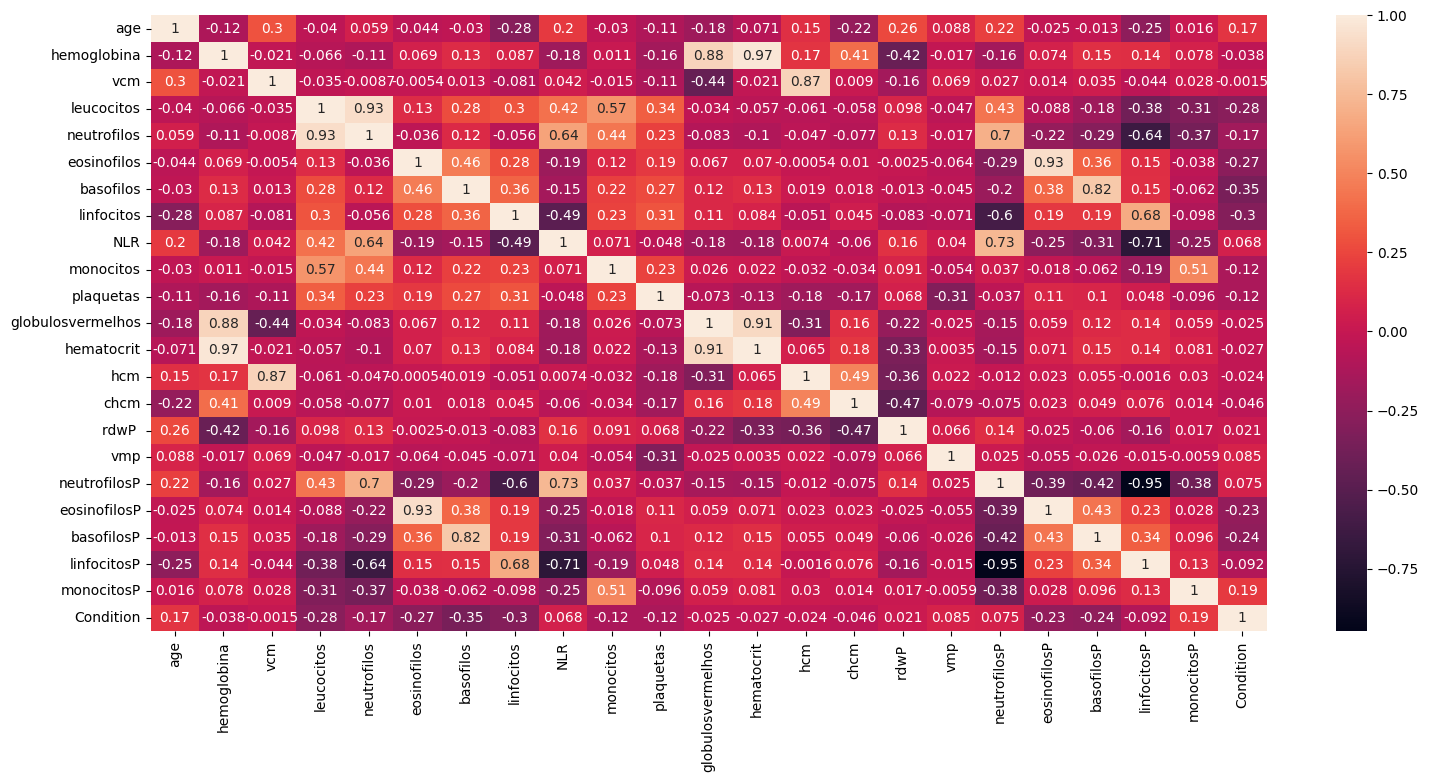

In [ ]:
cor = df.corr()
plt.figure(figsize = (18,8))
sns.heatmap(cor,annot=True)

In [ ]:
x_sl8 = df[['basofilos', 'leucocitos','age','monocitosP','eosinofilos','plaquetas','monocitos','linfocitos']]
modeldt_sl = DecisionTreeClassifier()
x_train,x_test,y_train,y_test = train_test_split(x_sl8,y,test_size = 0.2,random_state=42)
modeldt_sl.fit(x_train,y_train)
y_pred = modeldt_sl.predict(x_test)
print(classification_report(y_test, y_pred))
print(f'Presicion Score = {precision_score(y_test, y_pred)}')
print(f'Accurracy Score = {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       623
           1       0.56      0.50      0.53       272

    accuracy                           0.73       895
   macro avg       0.68      0.66      0.67       895
weighted avg       0.72      0.73      0.72       895

Presicion Score = 0.5601659751037344
Accurracy Score = 0.7284916201117319


#Logistic Regression


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML dataset/CSE 442/Covid Detection/BR-MF.csv")
df.head()

,sex,age,hemoglobina,vcm,leucocitos,neutrofilos,eosinofilos,basofilos,linfocitos,NLR,...,hcm,chcm,rdwP,vmp,neutrofilosP,eosinofilosP,basofilosP,linfocitosP,monocitosP,Condition
0,F,58,9.4,87.0,6590,4587,303,13,949,4.833509,...,29.0,33.3,11.9,10.8,69.6,4.6,0.2,14.4,11.2,1
1,F,51,13.0,80.9,4980,3112,0,10,1638,1.899878,...,26.4,32.6,14.4,10.6,62.5,0.0,0.2,32.9,4.4,1
2,F,38,13.2,85.2,10770,8411,22,32,1734,4.850634,...,29.7,34.8,11.9,9.7,78.1,0.2,0.3,16.1,5.3,0
3,M,65,16.8,87.4,7380,4465,59,37,2133,2.093296,...,30.7,35.1,12.9,11.0,60.5,0.8,0.5,28.9,9.3,0
4,M,61,14.6,85.7,4440,1558,178,18,2145,0.726340,...,30.2,35.2,11.8,11.2,35.1,4.0,0.4,48.3,12.2,1


In [ ]:
x = df.drop('Condition',axis=1);
y = df['Condition']

le = LabelEncoder()
x['sex'] = le.fit_transform(x['sex'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
#print(x_train)
#print(x_test)

In [ ]:
modellgr = LogisticRegression(max_iter=2000)
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
modellgr.fit(x_train,y_train)
y_pred = modellgr.predict(x_test)

0.7806956177559687


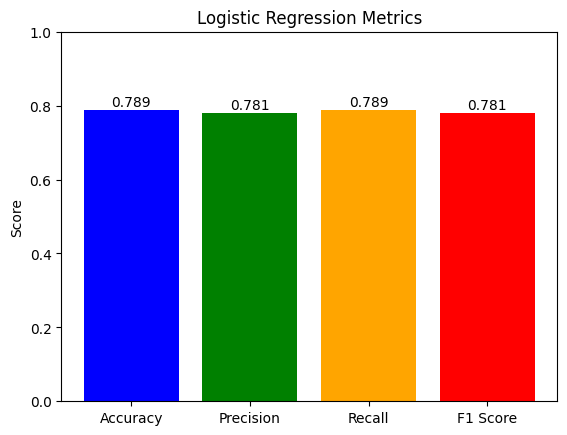

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print(precision)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'green', 'orange', 'red'])

# Adding the value annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
    ax.set_ylim(0,1)

plt.ylabel('Score')
plt.title('Logistic Regression Metrics')
plt.show()

#SVM


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML dataset/CSE 442/Covid Detection/BR-MF.csv")
df.head()

,sex,age,hemoglobina,vcm,leucocitos,neutrofilos,eosinofilos,basofilos,linfocitos,NLR,...,hcm,chcm,rdwP,vmp,neutrofilosP,eosinofilosP,basofilosP,linfocitosP,monocitosP,Condition
0,F,58,9.4,87.0,6590,4587,303,13,949,4.833509,...,29.0,33.3,11.9,10.8,69.6,4.6,0.2,14.4,11.2,1
1,F,51,13.0,80.9,4980,3112,0,10,1638,1.899878,...,26.4,32.6,14.4,10.6,62.5,0.0,0.2,32.9,4.4,1
2,F,38,13.2,85.2,10770,8411,22,32,1734,4.850634,...,29.7,34.8,11.9,9.7,78.1,0.2,0.3,16.1,5.3,0
3,M,65,16.8,87.4,7380,4465,59,37,2133,2.093296,...,30.7,35.1,12.9,11.0,60.5,0.8,0.5,28.9,9.3,0
4,M,61,14.6,85.7,4440,1558,178,18,2145,0.726340,...,30.2,35.2,11.8,11.2,35.1,4.0,0.4,48.3,12.2,1


In [ ]:
x = df.drop('Condition',axis=1);
y = df['Condition']

le = LabelEncoder()
x['sex'] = le.fit_transform(x['sex'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
modelsvm = SVC()
modelsvm.fit(x_train, y_train)
y_pred = modelsvm.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(f'Presicion Score = {precision_score(y_test, y_pred, average="weighted")}')
print(f'Accurracy Score = {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       623
           1       0.70      0.56      0.62       272

    accuracy                           0.79       895
   macro avg       0.76      0.73      0.74       895
weighted avg       0.79      0.79      0.79       895

Presicion Score = 0.7870290039016736
Accurracy Score = 0.794413407821229


0.7870290039016736


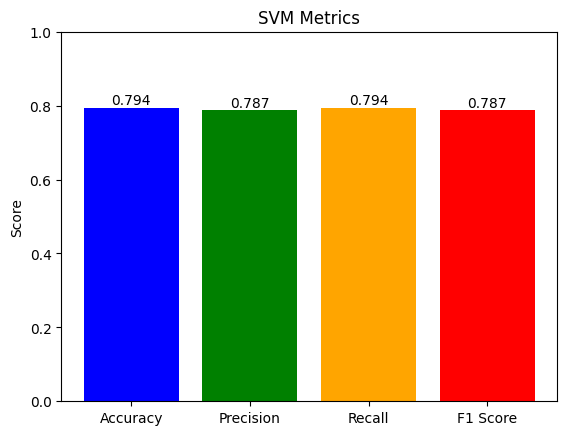

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print(precision)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'green', 'orange', 'red'])

# Adding the value annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
    ax.set_ylim(0,1)

plt.ylabel('Score')
plt.title('SVM Metrics')
plt.show()

In [ ]:
#taking top 8 features

x_sl8 = df[['basofilos', 'leucocitos','age','monocitosP','eosinofilos','plaquetas','monocitos','linfocitos']]
y = df['Condition']
x_train,x_test,y_train,y_test = train_test_split(x_sl8,y,test_size = 0.2,random_state=42)
#print(x_train)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
modelsvm_sl8 = SVC()
modelsvm_sl8.fit(x_train, y_train)
y_pred = modelsvm_sl8.predict(x_test)
#top8 result
print(classification_report(y_test, y_pred))
print(f'Presicion Score = {precision_score(y_test, y_pred)}')
print(f'Accurracy Score = {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       623
           1       0.67      0.59      0.63       272

    accuracy                           0.79       895
   macro avg       0.75      0.73      0.74       895
weighted avg       0.78      0.79      0.78       895

Presicion Score = 0.6736401673640168
Accurracy Score = 0.788826815642458


In [ ]:
df.columns

Index(['sex', 'age', 'hemoglobina', 'vcm', 'leucocitos', 'neutrofilos',
       'eosinofilos', 'basofilos', 'linfocitos', 'NLR', 'monocitos',
       'plaquetas', 'globulosvermelhos', 'hematocrit', 'hcm', 'chcm', 'rdwP ',
       'vmp', 'neutrofilosP', 'eosinofilosP', 'basofilosP', 'linfocitosP',
       'monocitosP', 'Condition'],
      dtype='object')

In [ ]:
x_check = [['F',58,9.4, 87, 6590,4587,303,13, 949, 4.833508957, 738, 251, 3.24, 28.2, 29, 33.3, 11.9, 10.8, 696, 4.6,0.2, 14.4, 11.2]]
le = LabelEncoder()
x_check[0] = le.fit_transform(x_check[0])
y_check = modelsvm.predict(x_check)[0]
y_check

0

#XGBoost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML dataset/CSE 442/Covid Detection/BR-MF.csv")
df.head()

,sex,age,hemoglobina,vcm,leucocitos,neutrofilos,eosinofilos,basofilos,linfocitos,NLR,...,hcm,chcm,rdwP,vmp,neutrofilosP,eosinofilosP,basofilosP,linfocitosP,monocitosP,Condition
0,F,58,9.4,87.0,6590,4587,303,13,949,4.833509,...,29.0,33.3,11.9,10.8,69.6,4.6,0.2,14.4,11.2,1
1,F,51,13.0,80.9,4980,3112,0,10,1638,1.899878,...,26.4,32.6,14.4,10.6,62.5,0.0,0.2,32.9,4.4,1
2,F,38,13.2,85.2,10770,8411,22,32,1734,4.850634,...,29.7,34.8,11.9,9.7,78.1,0.2,0.3,16.1,5.3,0
3,M,65,16.8,87.4,7380,4465,59,37,2133,2.093296,...,30.7,35.1,12.9,11.0,60.5,0.8,0.5,28.9,9.3,0
4,M,61,14.6,85.7,4440,1558,178,18,2145,0.726340,...,30.2,35.2,11.8,11.2,35.1,4.0,0.4,48.3,12.2,1


In [ ]:
x = df.drop('Condition',axis=1);
y = df['Condition']

le = LabelEncoder()
x['sex'] = le.fit_transform(x['sex'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [ ]:
# Define XGBoost parameters
params = {
    'objective': 'multi:softmax',  # Specify the learning task and the corresponding objective function
    'num_class': len(set(y)),  # Number of classes in your dataset
    'max_depth': 3,  # Maximum depth of a tree
    'learning_rate': 0.1,  # Step size shrinkage to prevent overfitting
    'n_estimators': 100  # Number of boosting rounds (trees)
}

# Create an XGBoost DMatrix for training and testing
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=params['n_estimators'])

# Make predictions on the test set
y_pred = model.predict(dtest)
print(classification_report(y_test, y_pred))
print(f'Presicion Score = {precision_score(y_test, y_pred)}')
print(f'Accurracy Score = {accuracy_score(y_test, y_pred)}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:24:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       623
           1       0.66      0.58      0.62       272

    accuracy                           0.78       895
   macro avg       0.74      0.72      0.73       895
weighted avg       0.78      0.78      0.78       895

Presicion Score = 0.6624472573839663
Accurracy Score = 0.7821229050279329


0.7757571790894241


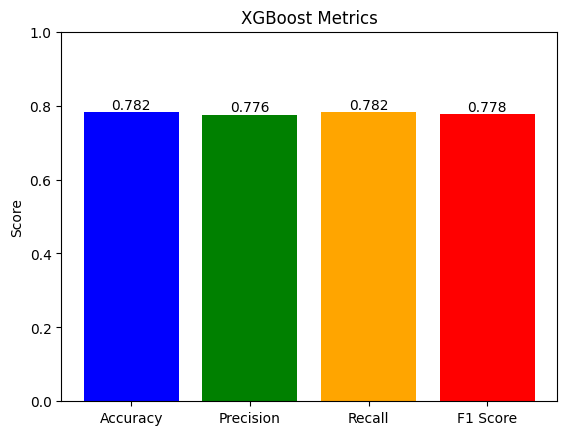

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print(precision)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'green', 'orange', 'red'])

# Adding the value annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
    ax.set_ylim(0,1)

plt.ylabel('Score')
plt.title('XGBoost Metrics')
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your own dataset or use a different dataset
# For demonstration purposes, I'm using the Iris dataset
iris = load_iris()
df = pd.read_csv("/content/drive/MyDrive/ML dataset/CSE 442/Covid Detection/BR-MF.csv")
X = df.drop('Condition',axis=1);
y = df['Condition']
le = LabelEncoder()
X['sex'] = le.fit_transform(X['sex'])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost parameters
param_grid = {
    'objective': ['binary:logistic'],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
}

# Create an XGBoost DMatrix for training
dtrain = xgb.DMatrix(X_train, label=y_train)

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Use GridSearchCV to perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Best Model Accuracy: {accuracy:.2f}')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'objective': 'binary:logistic'}
Best Model Accuracy: 0.79


#KNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML dataset/CSE 442/Covid Detection/BR-MF.csv")
x = df.drop('Condition',axis=1);
y = df['Condition']

le = LabelEncoder()
x['sex'] = le.fit_transform(x['sex'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

scaler = StandardScaler()

# Fit and transform the scaler on the training data
x_train = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test = scaler.transform(x_test)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the scaled data
knn_classifier.fit(x_train, y_train)

# Make predictions on the scaled test set
y_pred = knn_classifier.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       623
           1       0.62      0.49      0.55       272

    accuracy                           0.75       895
   macro avg       0.71      0.68      0.69       895
weighted avg       0.74      0.75      0.75       895



0.7431532782566589


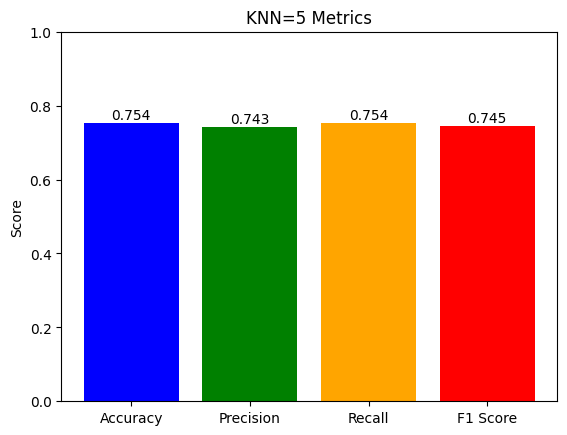

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print(precision)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'green', 'orange', 'red'])

# Adding the value annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
    ax.set_ylim(0,1)

plt.ylabel('Score')
plt.title('KNN=5 Metrics')
plt.show()

#ANN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML dataset/CSE 442/Covid Detection/BR-MF.csv")
x = df.drop('Condition',axis=1);
y = df['Condition']

le = LabelEncoder()
x['sex'] = le.fit_transform(x['sex'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

scaler = StandardScaler()

# Fit and transform the scaler on the training data
x_train = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test = scaler.transform(x_test)

In [ ]:
model = MLPClassifier(activation="relu",hidden_layer_sizes=(200,200,200),learning_rate_init=0.001,max_iter=1000,solver="sgd")
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       623
           1       0.58      0.51      0.55       272

    accuracy                           0.74       895
   macro avg       0.69      0.68      0.68       895
weighted avg       0.73      0.74      0.73       895



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7321398653509852


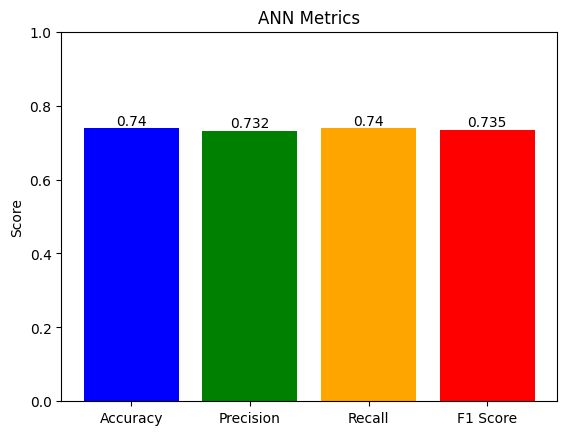

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print(precision)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'green', 'orange', 'red'])

# Adding the value annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
    ax.set_ylim(0,1)

plt.ylabel('Score')
plt.title('ANN Metrics')
plt.show()

#Gaussian Naive Bayes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML dataset/CSE 442/Covid Detection/BR-MF.csv")
x = df.drop('Condition',axis=1);
y = df['Condition']

le = LabelEncoder()
x['sex'] = le.fit_transform(x['sex'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

scaler = StandardScaler()

# Fit and transform the scaler on the training data
x_train = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test = scaler.transform(x_test)

In [ ]:
model = GaussianNB(var_smoothing=1.25)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       623
           1       0.59      0.60      0.59       272

    accuracy                           0.75       895
   macro avg       0.70      0.71      0.71       895
weighted avg       0.75      0.75      0.75       895



0.7507724581044827


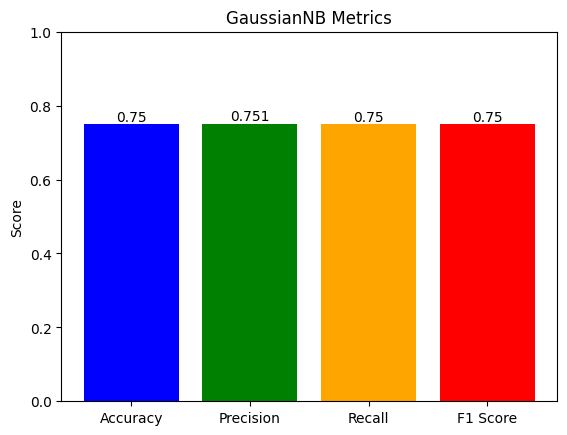

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print(precision)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'green', 'orange', 'red'])

# Adding the value annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
    ax.set_ylim(0,1)

plt.ylabel('Score')
plt.title('GaussianNB Metrics')
plt.show()

#LightGBM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import lightgbm as lgb

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML dataset/CSE 442/Covid Detection/BR-MF.csv")
x = df.drop('Condition',axis=1);
y = df['Condition']

le = LabelEncoder()
x['sex'] = le.fit_transform(x['sex'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

scaler = StandardScaler()

# Fit and transform the scaler on the training data
x_train = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test = scaler.transform(x_test)

In [ ]:
# Create a LightGBM dataset
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)

# Set LightGBM parameters
params = {
    'objective': 'binary',
    'metric': 'binary_error',  # Alternatively, 'binary_logloss' for binary classification
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the LightGBM model
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions on the test set
y_pred = bst.predict(x_test, num_iteration=bst.best_iteration)
y_pred = (y_pred > 0.5).astype(int)

[LightGBM] [Info] Number of positive: 1093, number of negative: 2485
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3919
[LightGBM] [Info] Number of data points in the train set: 3578, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.305478 -> initscore=-0.821346
[LightGBM] [Info] Start training from score -0.821346


0.7763224036545544


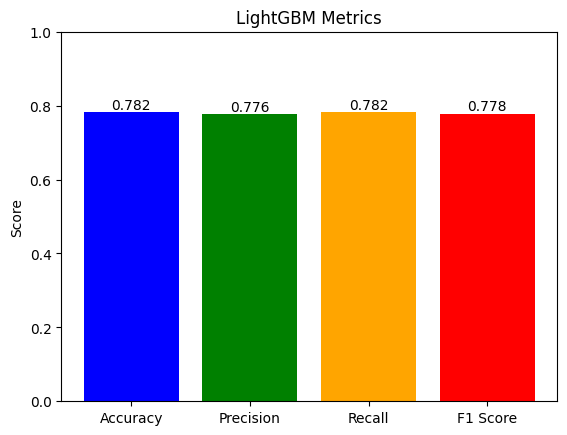

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print(precision)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'green', 'orange', 'red'])

# Adding the value annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
    ax.set_ylim(0,1)

plt.ylabel('Score')
plt.title('LightGBM Metrics')
plt.show()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X, y)

feature_importance2 = model2.feature_importances_
feature_importance_df2 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance2})
print(feature_importance_df2.sort_values(by='Importance', ascending=False))

In [ ]:
feature_importance_df2 = feature_importance_df2.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df2['Feature'], feature_importance_df2['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest Classifier)')
plt.show()

In [ ]:
X.columns
features_to_drop = ["sex","age","hemoglobina","vcm","NLR","globulosvermelhos","hematocrit","hcm","chcm","rdwP ","vmp","neutrofilosP","eosinofilosP","basofilosP","linfocitosP","monocitosP"]
X1.drop(features_to_drop, axis=1, inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [ ]:
accuracy2 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy2:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


In [ ]:
import seaborn as sns
conf_matrix2 = confusion_matrix(y_test, y_pred)
confusion_df2 = pd.DataFrame(conf_matrix2, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)
f2 = f1_score(y_test, y_pred)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
metrics = {'Accuracy': accuracy2, 'Precision': precision2, 'Recall': recall2, 'F1 Score': f2}
metrics_df2 = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Score'])

sns.barplot(x='Metric', y='Score', data=metrics_df2, palette='viridis', ax=axes[1])
axes[1].set_title('Performance Metrics')
axes[1].set_ylim(0, 1)
plt.show()